In [ ]:
# 

# import  library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# Problem

1) Prepare a classification model using SVM for salary data 


# Import Dataset

In [ ]:
test=pd.read_csv('/content/SalaryData_Test(1).csv')



In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9311,38,Private,HS-grad,9.0,Separated,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
9312,44,Private,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
9313,45,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,7688.0,0.0,50.0,United-States,>50K
9314,32,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


# Data Description

age --> age of a person

workclass	--> A work class is a grouping of work 

education	-- >Education of an individuals	

maritalstatus --> Marital status of an individulas

occupation	 --> occupation of an individuals

relationship --> 	

race -->  Race of an Individual

sex -->  Gender of an Individual

capitalgain -->  profit received from the sale of an investment

capitalloss	--> A decrease in the value of a capital asset

hoursperweek --> number of hours work per week	

native --> Native of an individual

Salary --> salary of an individual

# EDA(Exploratory data analysis)

In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [ ]:

test.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,9316.000000,9315.000000,9315.000000,9315.000000,9315.000000
mean,38.705668,10.114654,1194.392700,90.105207,41.030166
std,13.397442,2.562249,8213.107457,409.220789,12.055463
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
test.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
9311    False
9312    False
9313    False
9314    False
9315     True
Length: 9316, dtype: bool

In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      1
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [ ]:
test.shape

(9316, 14)

In [ ]:
test.dtypes

age                int64
workclass         object
education         object
educationno      float64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
Salary            object
dtype: object

In [ ]:
test.drop(['native'],axis=1,inplace=True)

In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,<=50K
1,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,<=50K
2,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,>50K
3,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,>50K
4,34,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,<=50K


# define the categorical variables and Numeric variables

In [ ]:

categorical = [var for var in test.columns if test[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in test.columns if test[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 8 categorical variables

The categorical variables are :
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'Salary']


There are 5 Numeric variables

The Numeric variables are :
 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [ ]:

categorical=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'Salary']
Continuous=['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

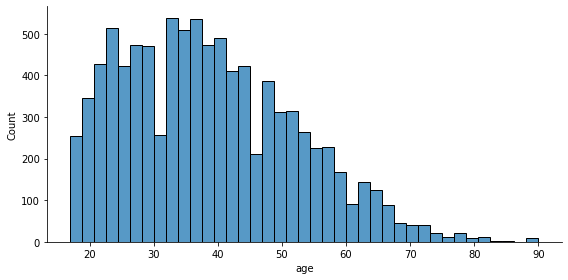

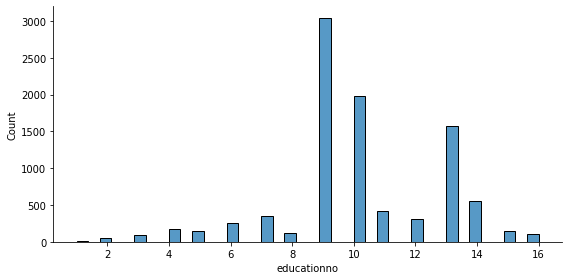

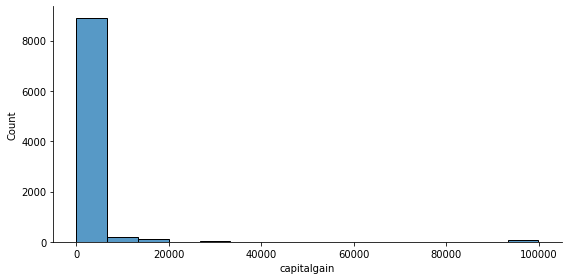

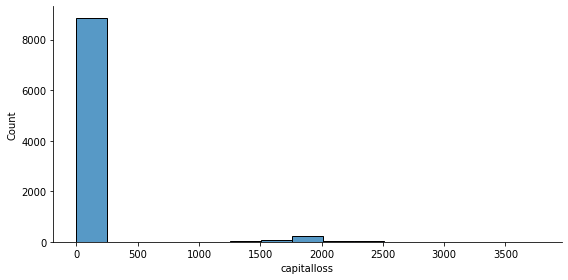

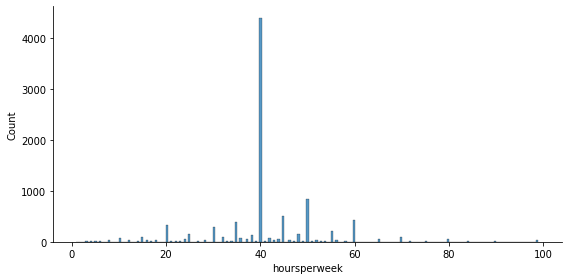

In [ ]:
for feature in Continuous:
  sns.displot(data = test, x=feature,height = 4, aspect = 2, palette='deep')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


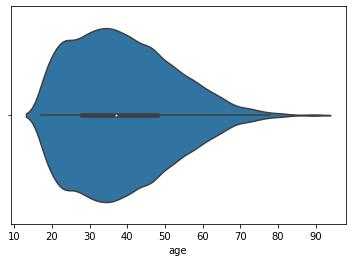

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


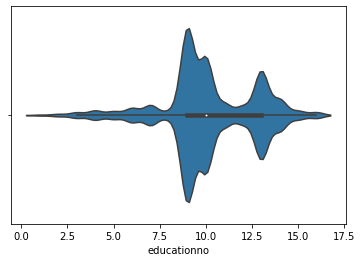

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


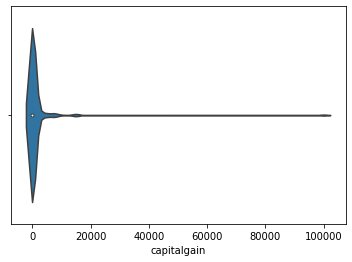

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


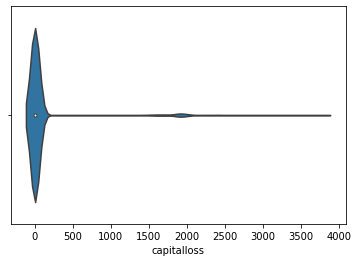

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


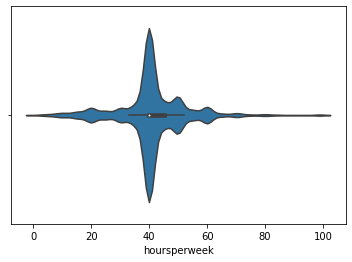

In [ ]:
for feature in Continuous:
  plt.figure()
  sns.violinplot(test[feature])
  plt.show()

In [ ]:
#sns.catplot('x=S','y=',data=test.query('profit>1000'),kind='swarn')

In [ ]:
test.agg(["skew","kurt"])

,age,educationno,capitalgain,capitalloss,hoursperweek
skew,0.536112,-0.320999,11.570156,4.496738,0.359502
kurt,-0.181312,0.618468,143.591390,19.080685,3.267311


In [ ]:
test['Salary'].value_counts()

 <=50K    7025
 >50K     2290
Name: Salary, dtype: int64

In [ ]:
pd.crosstab(test['occupation'],test['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,952,163
Armed-Forces,1,2
Craft-repair,942,282
Exec-managerial,669,587
Farming-fishing,277,37
Handlers-cleaners,402,35
Machine-op-inspct,568,71
Other-service,959,36
Priv-house-serv,54,2


Skew: 0.536111791886582
Kurtosis: -0.18131221328382807


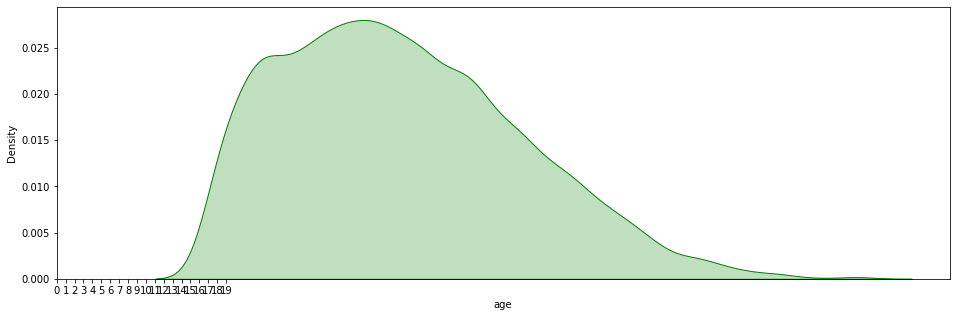

Skew: -0.32099937243135945
Kurtosis: 0.6184678428156434


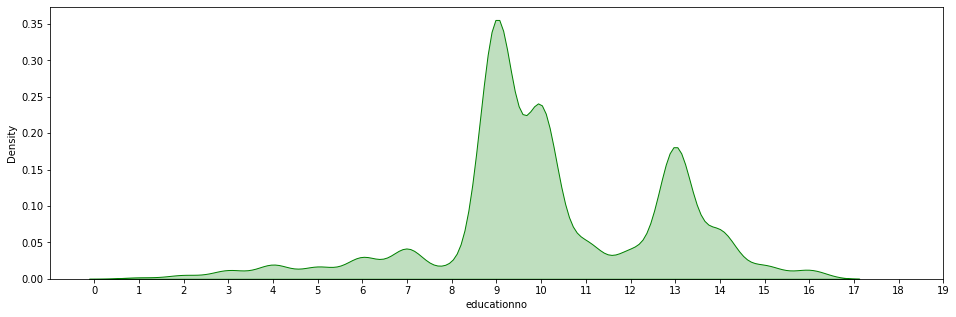

Skew: 11.570156200574004
Kurtosis: 143.59139014149105


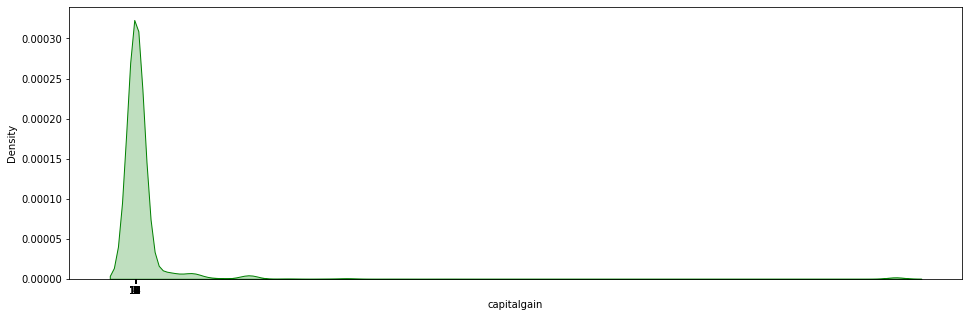

Skew: 4.496738424623098
Kurtosis: 19.08068507476673


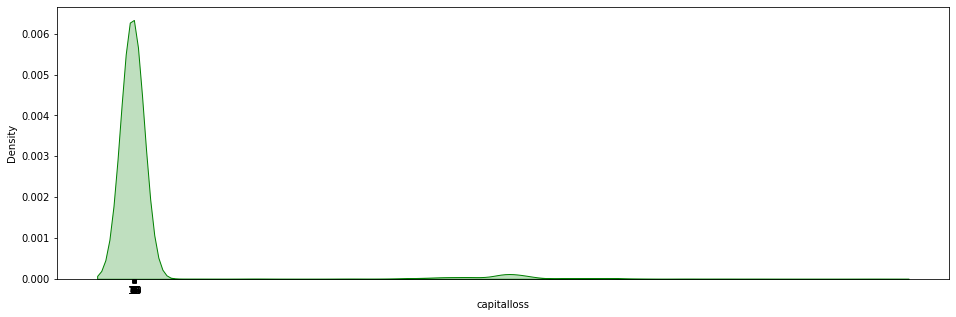

Skew: 0.3595017564605269
Kurtosis: 3.26731065345459


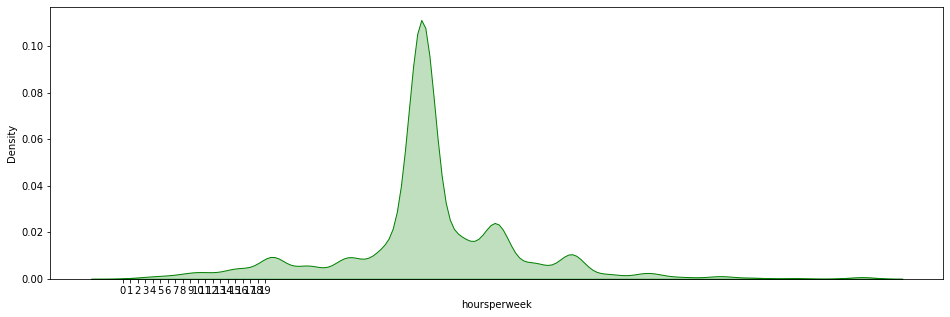

In [ ]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(test[i].skew()))
  print("Kurtosis: {}".format(test[i].kurtosis()))
  ax = sns.kdeplot(test[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(test.corr(),annot=True)

In [ ]:
sns.pairplot(test,hue='Salary')
plt.figure(figsize=(10,5))
plt.show()

2. Defining Dependent and Independent Variable

In [ ]:
x = test.drop(["Salary"],axis=1)
y = test["Salary"]

In [ ]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
9311     <=50K
9312     <=50K
9313      >50K
9314     <=50K
9315       NaN
Name: Salary, Length: 9316, dtype: object

4. Encoding the Independent Variable and Dependent variable

In [ ]:
for columns in test.columns:#test.columns
  if test[columns].dtype=='object':
    print(columns)

workclass
education
maritalstatus
occupation
relationship
race
sex
Salary


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical:
  le=LabelEncoder()
  le.fit(test[col])
  test[col]=le.transform(test[col])



In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7.0,4,6,3,2,1,0.0,0.0,40.0,0
1,38,2,11,9.0,2,4,0,4,1,0.0,0.0,50.0,0
2,28,1,7,12.0,2,10,0,4,1,0.0,0.0,40.0,1
3,44,2,16,10.0,2,6,0,2,1,7688.0,0.0,40.0,1
4,34,2,0,6.0,4,7,1,4,1,0.0,0.0,30.0,0


5. Scaling the Data

In [ ]:
pd.Series(y).value_counts()

 <=50K    7025
 >50K     2290
Name: Salary, dtype: int64

In [ ]:
scaler = MinMaxScaler()
model = scaler.fit(test)
scaled_data = model.transform(test)

In [ ]:
test1 = pd.DataFrame(scaled_data, columns = test.columns)
test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,0.109589,0.333333,0.0625,0.400000,0.571429,0.428571,0.500000,0.4,0.5,0.000000,0.0,0.397959,0.0
1,0.287671,0.333333,0.6875,0.533333,0.285714,0.285714,0.000000,0.8,0.5,0.000000,0.0,0.500000,0.0
2,0.150685,0.166667,0.4375,0.733333,0.285714,0.714286,0.000000,0.8,0.5,0.000000,0.0,0.397959,0.5
3,0.369863,0.333333,1.0000,0.600000,0.285714,0.428571,0.000000,0.4,0.5,0.076881,0.0,0.397959,0.5
4,0.232877,0.333333,0.0000,0.333333,0.571429,0.500000,0.166667,0.8,0.5,0.000000,0.0,0.295918,0.0


In [ ]:
x = test1.drop("Salary",axis=1)
y = test1.iloc[:,-1]

In [ ]:
test1['Salary'].value_counts()

0.0    11360
1.0     3700
Name: Salary, dtype: int64

As the data is highly imbalanced, we shall resample it and make it balanced

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [ ]:
y.value_counts()

0.0    11360
1.0    11360
Name: Salary, dtype: int64

The testing dataset is ready to be feed in the model

In [ ]:
x.shape,y.shape

((22720, 12), (22720,))

In [ ]:
pd.Series(y).value_counts()

0.0    11360
1.0    11360
Name: Salary, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15904, 12), (15904,), (6816, 12), (6816,))

# Grid Search CV

In [ ]:

param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [ ]:
grid.fit(x_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid_pred = grid.predict(x_test)

In [ ]:
model=SVC(C= 15, gamma= 0.001, kernel= 'rbf')
model.fit(x_train , y_train)


SVC(C=15, gamma=0.001)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [ ]:

acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 75.04401408450704


In [ ]:
confusion_matrix(y_test,y_pred)

array([[2337, 1076],
       [ 625, 2778]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73      3413
         1.0       0.72      0.82      0.77      3403

    accuracy                           0.75      6816
   macro avg       0.75      0.75      0.75      6816
weighted avg       0.75      0.75      0.75      6816



In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.7536
Test set score: 0.7504


In [ ]:
# print the scores between dependent test and predicted value
print("Accuracy_score", accuracy_score(y_test,y_pred)*100)

Accuracy_score 75.04401408450704


# Confusion matrix

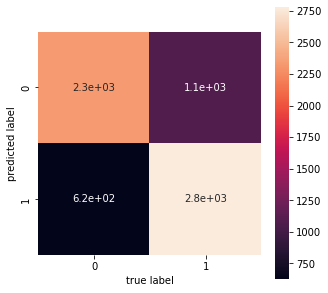

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73      3413
         1.0       0.72      0.82      0.77      3403

    accuracy                           0.75      6816
   macro avg       0.75      0.75      0.75      6816
weighted avg       0.75      0.75      0.75      6816



# AUC and ROC

Model AUC score: 0.7505366811087475 




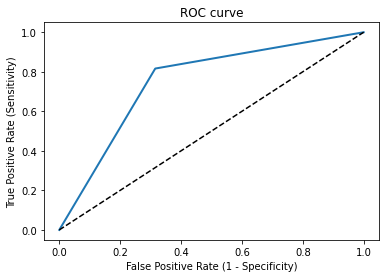

In [ ]:
# AUC and ROC
from sklearn.metrics import roc_auc_score,roc_curve
print(f'Model AUC score: {roc_auc_score(y_test, y_pred)} \n\n')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# train Data set

# import the dataset

In [ ]:
train=pd.read_csv('/content/SalaryData_Train(1).csv')

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA(Exploratory data analysis)

In [ ]:

train.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157    False
30158    False
30159    False
30160    False
Length: 30161, dtype: bool

In [ ]:

train.shape

(30161, 14)

In [ ]:
train.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [ ]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [ ]:
train.drop(['native'],axis=1,inplace=True)

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


# define the categorical variables and Numeric variables

In [ ]:
categorical=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'Salary']
Continuous=['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

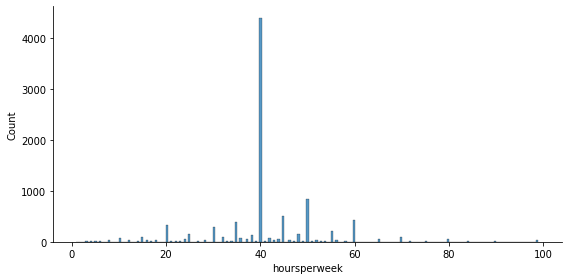

In [ ]:
sns.displot(data = test, x=feature,height = 4, aspect = 2, palette='deep')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


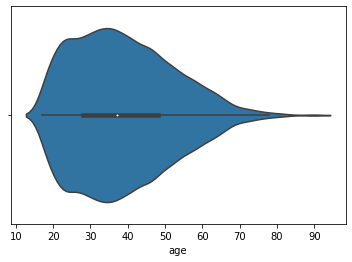

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


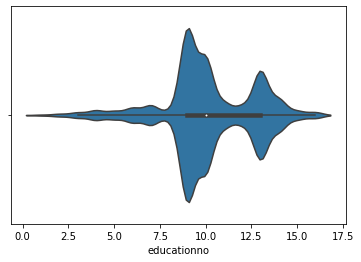

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


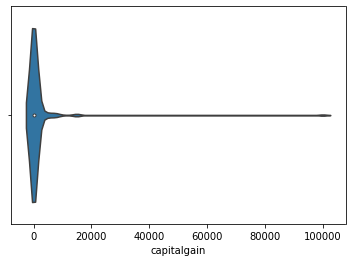

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


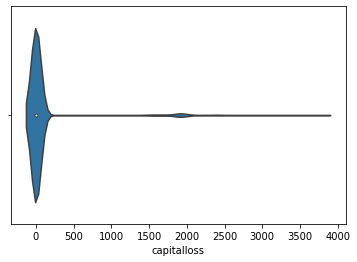

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


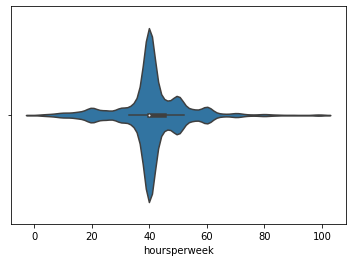

In [ ]:
for feature in Continuous:
  plt.figure()
  sns.violinplot(test[feature])
  plt.show()

In [ ]:
train.agg(["skew","kurt"])

,age,educationno,capitalgain,capitalloss,hoursperweek
skew,0.53018,-0.305378,11.902483,4.528238,0.330856
kurt,-0.14476,0.643605,153.661174,19.529284,3.167683


In [ ]:
train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [ ]:
pd.crosstab(train['occupation'],train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


Skew: 0.5327722992466369
Kurtosis: -0.22154834967385195


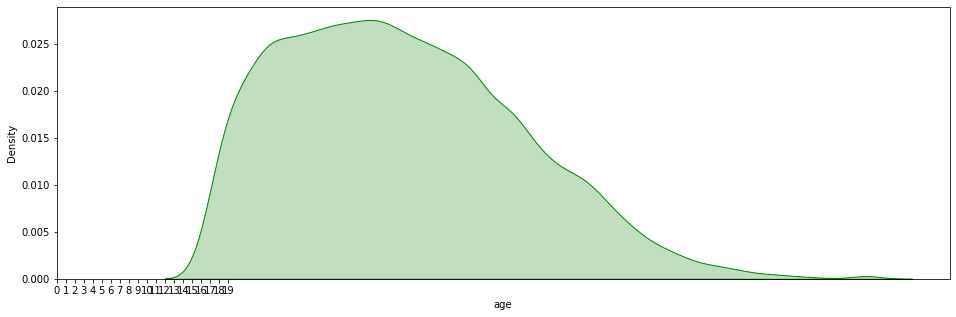

Skew: -0.32821690325134184
Kurtosis: 0.6082127638882504


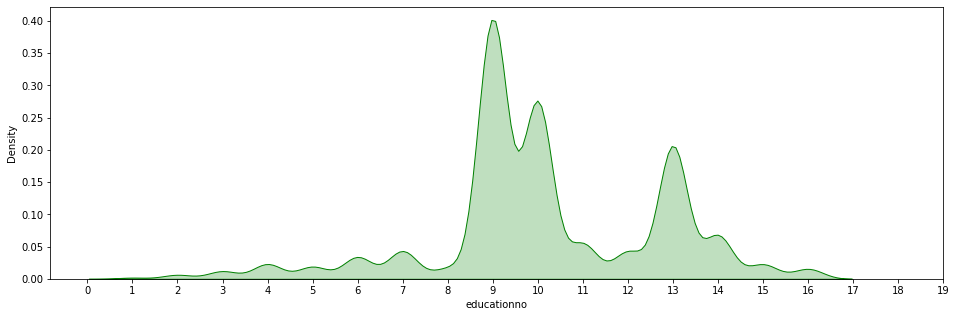

Skew: 10.996476164068104
Kurtosis: 127.90163915348056


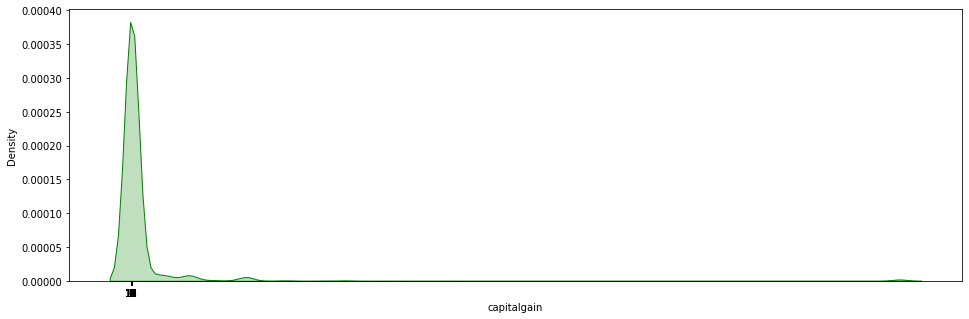

Skew: 4.471345206123316
Kurtosis: 18.808592496052423


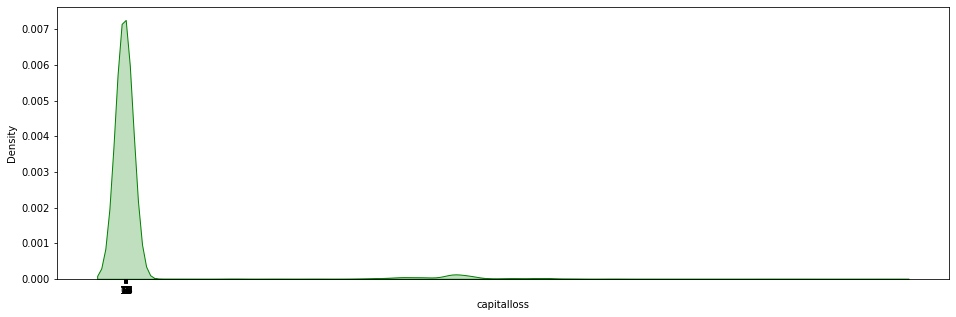

Skew: 0.4051794384431581
Kurtosis: 3.4096570605012015


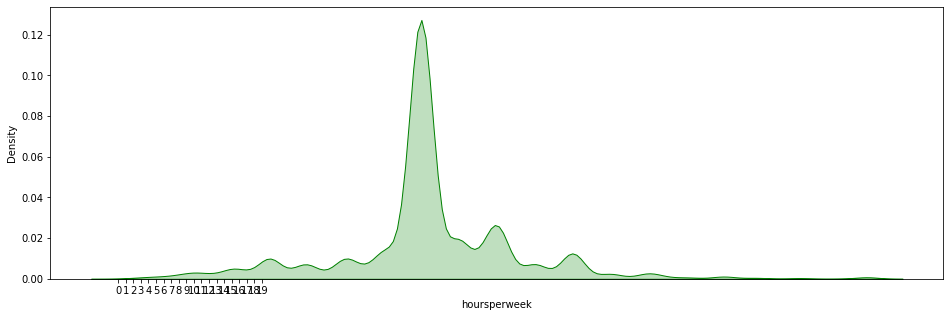

In [ ]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(test[i].skew()))
  print("Kurtosis: {}".format(test[i].kurtosis()))
  ax = sns.kdeplot(train[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()

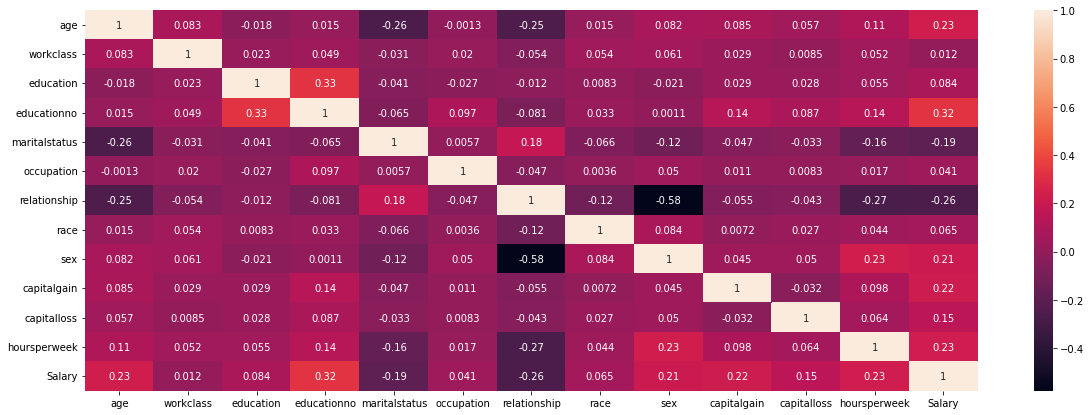

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(test.corr(),annot=True)

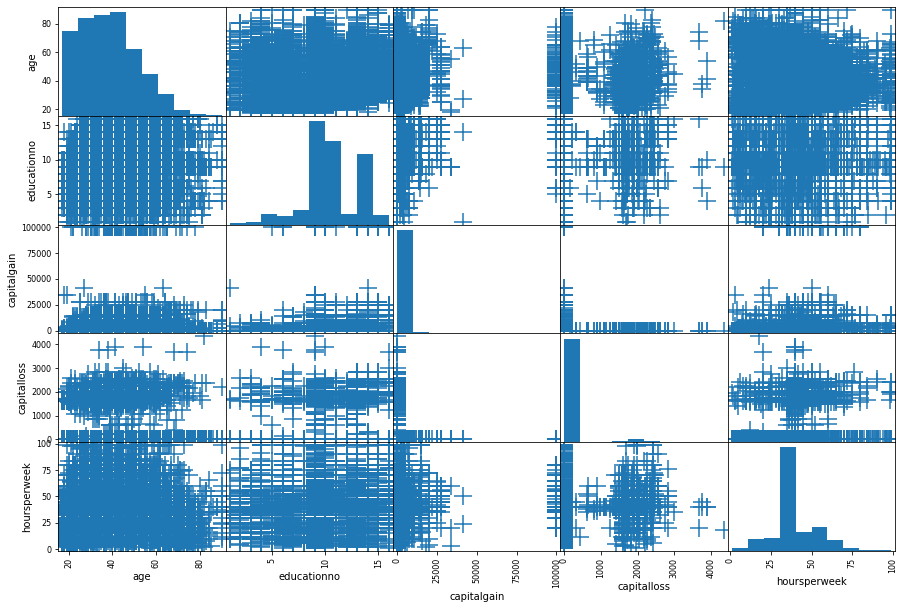

In [ ]:

# scatter matrix to observe relation between every column attribute
pd.plotting.scatter_matrix(train,
                           figsize=[15,10],
                           diagonal='hist',
                           alpha=1,
                           s = 300, 
                           marker = '+',
                           edgecolor= ' red')
plt.show()

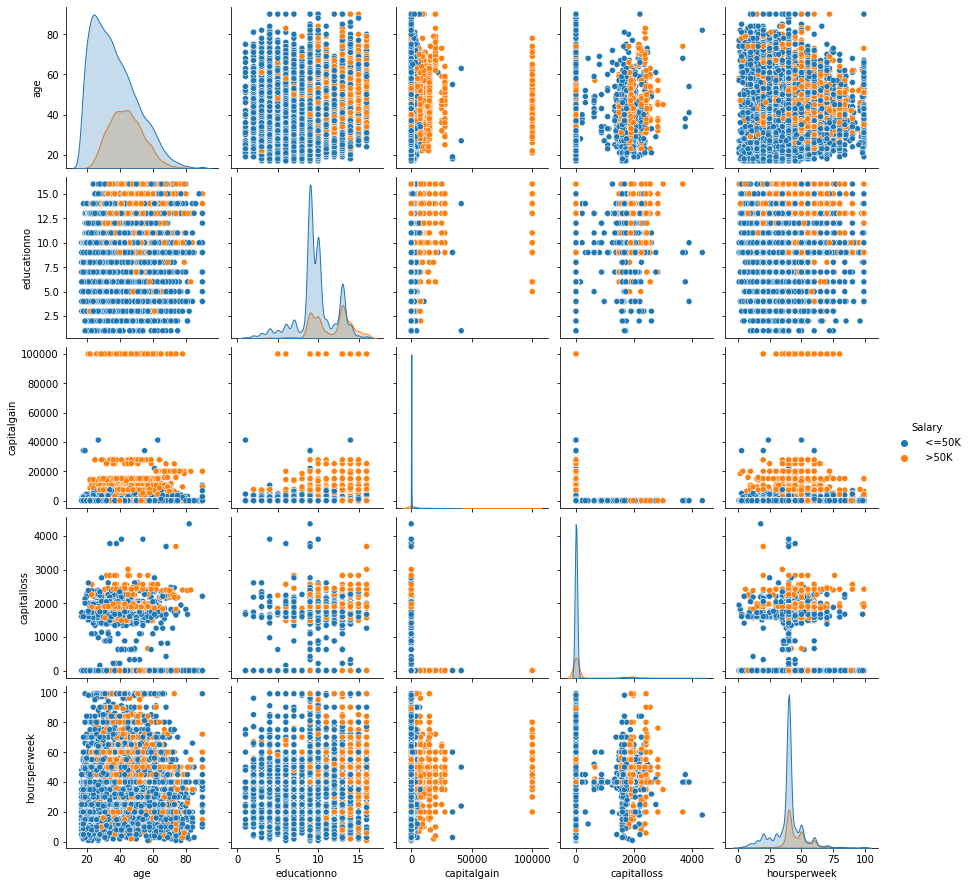

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.pairplot(train,hue='Salary')
plt.figure(figsize=(10,5))
plt.show()

Encoding the Dependent Variable

In [ ]:
for columns in train.columns:#test.columns
  if train[columns].dtype=='object':
    print(columns)

workclass
education
maritalstatus
occupation
relationship
race
sex
Salary


In [ ]:
train.isnull()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,False,False,False,False,False,False,False,False,False,False,False,False,False
30157,False,False,False,False,False,False,False,False,False,False,False,False,False
30158,False,False,False,False,False,False,False,False,False,False,False,False,False
30159,False,False,False,False,False,False,False,False,False,False,False,False,False


Encoding the Dependent Variable and Independent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical:
  le=LabelEncoder()
  le.fit(train[col])
  train[col]=le.transform(train[col])

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [ ]:
scaler = MinMaxScaler()
model = scaler.fit(train)
scaled_data = model.transform(train)

In [ ]:
train1 = pd.DataFrame(scaled_data, columns = train.columns)
train1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.0


In [ ]:
x = train1.drop("Salary",axis=1)
y = train1.iloc[:,-1]

In [ ]:
train1['Salary'].value_counts()

0.0    22653
1.0     7508
Name: Salary, dtype: int64

#As the data is highly imbalanced, we shall resample it and make it balanced

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

oversample=SMOTE()
x,y=oversample.fit_resample(x,y)
y.value_counts()

0.0    22653
1.0    22653
Name: Salary, dtype: int64

#The testing dataset is ready to be feed in the model

In [ ]:
x.shape,y.shape

((45306, 12), (45306,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((31714, 12), (31714,), (13592, 12), (13592,))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


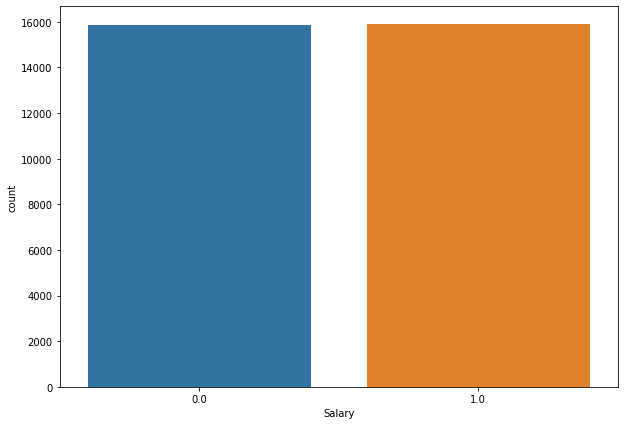

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y_train)
plt.show()

# Grid Search CV

In [ ]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.817 total time=  27.6s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.822 total time=  26.9s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.822 total time=  37.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.828 total time=  29.4s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.819 total time=  27.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.799 total time=  31.1s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.803 total time=  31.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.802 total time=  30.8s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.807 total time=  31.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.797 total time=  30.4s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.762 total time=  39.6s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

In [ ]:
grid.best_params_

AttributeError: ignored

In [ ]:
model=SVC(C= 15, gamma= 0.001, kernel= 'rbf')
model.fit(x_train , y_train)

In [ ]:
y_pred = model.predict(x_train)
y_pred

In [ ]:
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)

In [ ]:
confusion_matrix(y_train,y_pred)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

In [ ]:
# print the scores between dependent test and predicted value
print("Accuracy_score", accuracy_score(y_train,y_pred)*100)

# Confusion matrix

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
# Classification report
print(classification_report(y_train, y_pred))

# AUC and ROC

In [ ]:
# AUC and ROC
from sklearn.metrics import roc_auc_score,roc_curve
print(f'Model AUC score: {roc_auc_score(y_train, y_pred)} \n\n')

fpr, tpr, thresholds = roc_curve(y_train, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()